# <center>A Statistical Analysis of Music Taste</center>
# <center>The Analysis Plaground</center>
## <center>MAT 441 Applied Statistics | DePaul University</center>
## <center>Yianni Mercer | Fall 2021</center>
 <center> <img src="imgs/Spotify_Logo_RGB_Green.jpeg" style="height:100px">  <center>

### Below is a series of Python code relative to the statistical analysis portion of the project

#### Declaring the Correct Working Directory

In [1]:
## Changing current working directory to the base root of the project, so I can maneuver between subdirectories
import os
cwd = os.getcwd() # get cwd
cwd_list = cwd.split('/')[:-1] # split the cwd on the '/' character into a list and select every item except the last one
ch = '/' # declare the '/' character
os.chdir(ch.join(cwd_list)) #Rejoin the list on the '/' character and use the os.chdir to change the current working directory
os.getcwd() # show new cwd

'/Users/yiannimercer/Library/Mobile Documents/iCloud~com~getrocketbook~Rocketbook/Documents/MAT441_Applied_Stats_I/Final/spotify_liked_songs_analysis'

#### Import the Data

In [2]:
import pandas as pd #practically tidyverse/dplyr R libraries equivalent, however many of the base R functions like read.csv come with pandas in Python (not base Python)
df = pd.read_csv("data_collection/data_files/spotify_liked_final_df.csv",parse_dates=['date_liked','liked_date']) # read in csv file by specifying file path
df.head() #print first 10 rows of the df

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,liked,date_liked,liked_date
0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,0.611,0.389,99373.0,0.910,...,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0.0,NaT,NaT
1,1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,0.246,0.590,137373.0,0.737,...,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,0.0,NaT,NaT
2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,0.952,0.663,170267.0,0.131,...,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,0.0,NaT,NaT
3,3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,0.703,0.240,152427.0,0.326,...,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0.0,NaT,NaT
4,4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.950,0.331,82625.0,0.225,...,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,0.0,NaT,NaT


#### Minor Clean Up

In [3]:
df = df.drop(['Unnamed: 0','date_liked'],axis=1) # Dropping the index and duplicated date_liked column that is in the data frame 
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,liked,liked_date
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,0.611,0.389,99373.0,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0.0,NaT
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,0.246,0.590,137373.0,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,0.0,NaT
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,0.952,0.663,170267.0,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,0.0,NaT
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,0.703,0.240,152427.0,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0.0,NaT
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.950,0.331,82625.0,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,0.0,NaT


#### Initial Observations

In [43]:
print("The columns of our Data Frame: \n{}".format(df.columns))

The columns of our Data Frame: 
Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'liked',
       'liked_date'],
      dtype='object')


In [44]:
print("The shape of the Data Frame: {} \n\n\nSome basic information regarding the column in our Data Frame: ".format(df.shape))
print(df.info())

The shape of the Data Frame: (176514, 20) 


Some basic information regarding the column in our Data Frame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176514 entries, 0 to 176513
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   genre             176514 non-null  object             
 1   artist_name       176514 non-null  object             
 2   track_name        176514 non-null  object             
 3   track_id          176514 non-null  object             
 4   popularity        176514 non-null  float64            
 5   acousticness      176514 non-null  float64            
 6   danceability      176514 non-null  float64            
 7   duration_ms       176514 non-null  float64            
 8   energy            176514 non-null  float64            
 9   instrumentalness  176514 non-null  float64            
 10  key               176514 non-null  object             


#### Descriptive Statistics

In [45]:
print("Basic Summary Descriptive Statistics of Data Frame")
df.describe()

Basic Summary Descriptive Statistics of Data Frame


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,liked
count,176514.000000,176514.000000,176514.000000,1.765140e+05,176514.000000,176514.000000,176514.000000,176514.000000,176514.000000,176514.000000,176514.000000,176514.000000
mean,36.257634,0.403876,0.541111,2.361540e+05,0.557203,0.172211,0.224628,-10.137290,0.127471,117.214397,0.451642,0.021698
std,17.392089,0.366286,0.190441,1.305749e+05,0.275855,0.323038,0.211150,6.398382,0.204460,31.323689,0.267853,0.145696
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000,0.000000
25%,25.000000,0.045500,0.415000,1.782800e+05,0.344000,0.000000,0.097500,-12.850000,0.036800,92.007000,0.222000,0.000000
50%,37.000000,0.288000,0.558000,2.194750e+05,0.592000,0.000071,0.130000,-8.189000,0.049400,115.009000,0.440000,0.000000
75%,49.000000,0.791000,0.683000,2.685730e+05,0.789000,0.091400,0.277000,-5.629000,0.102000,138.825000,0.667000,0.000000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000,1.000000


In [46]:
print("Missing Values Per Each Column:")
df.isna().sum()

Missing Values Per Each Column:


genre                    0
artist_name              0
track_name               0
track_id                 0
popularity               0
acousticness             0
danceability             0
duration_ms              0
energy                   0
instrumentalness         0
key                      0
liveness                 0
loudness                 0
mode                     0
speechiness              0
tempo                    0
time_signature           0
valence                  0
liked                    0
liked_date          173842
dtype: int64

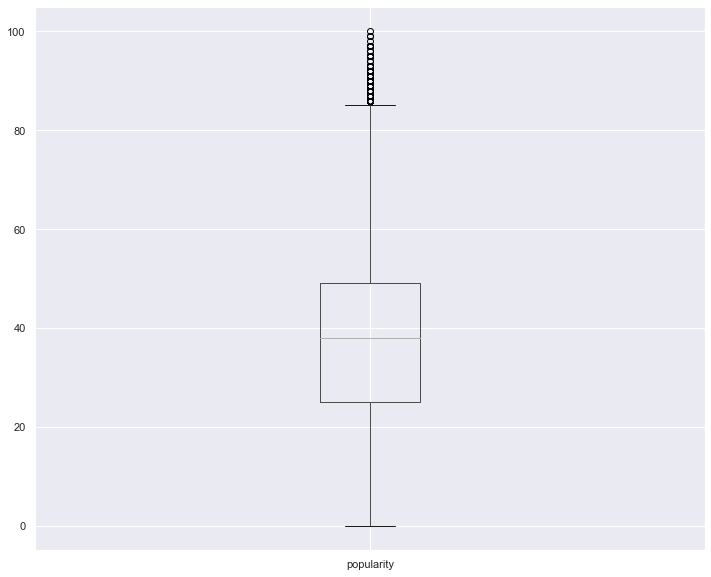

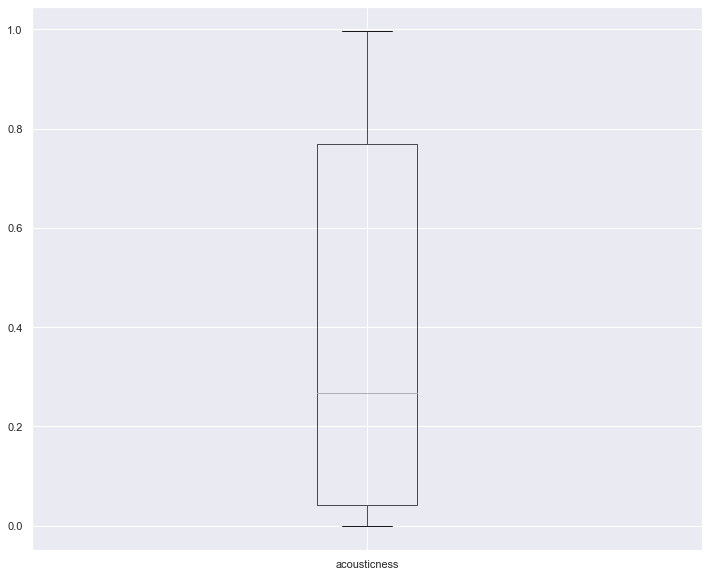

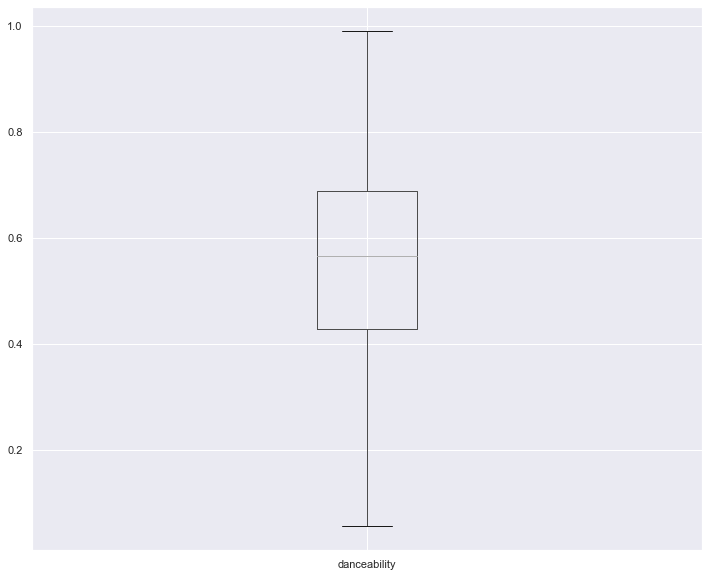

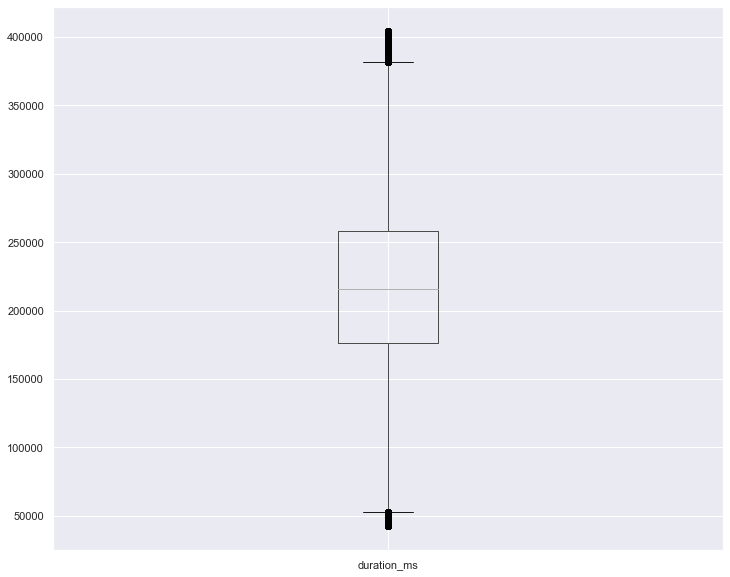

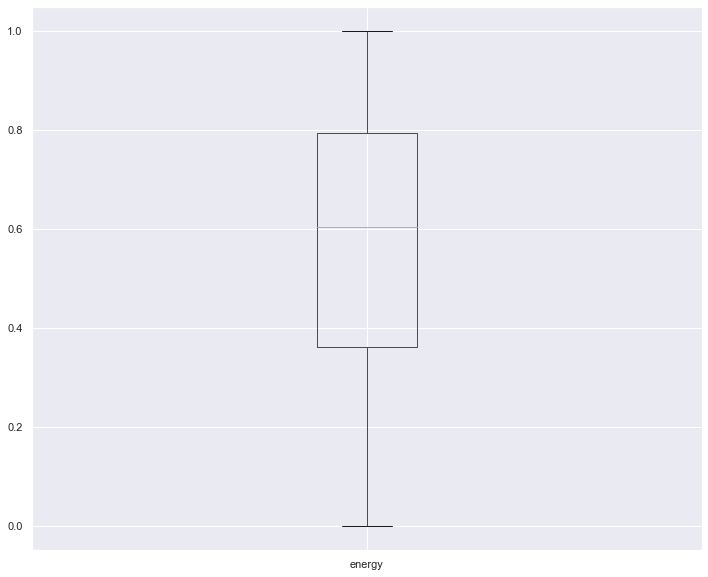

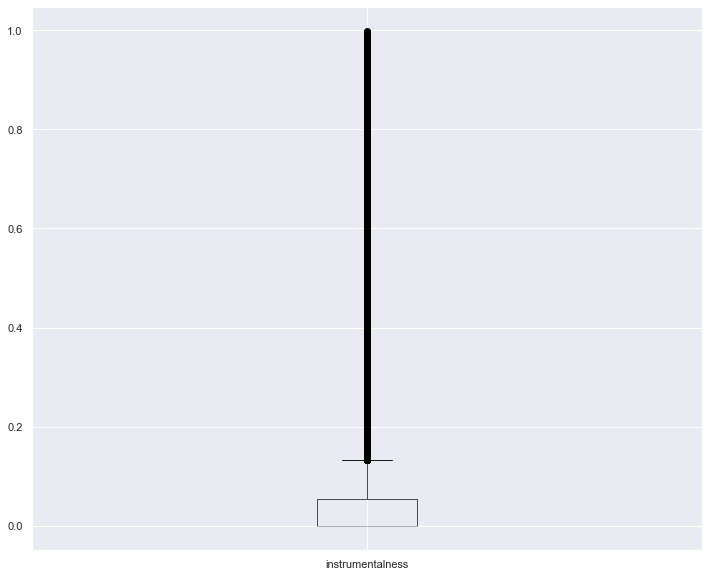

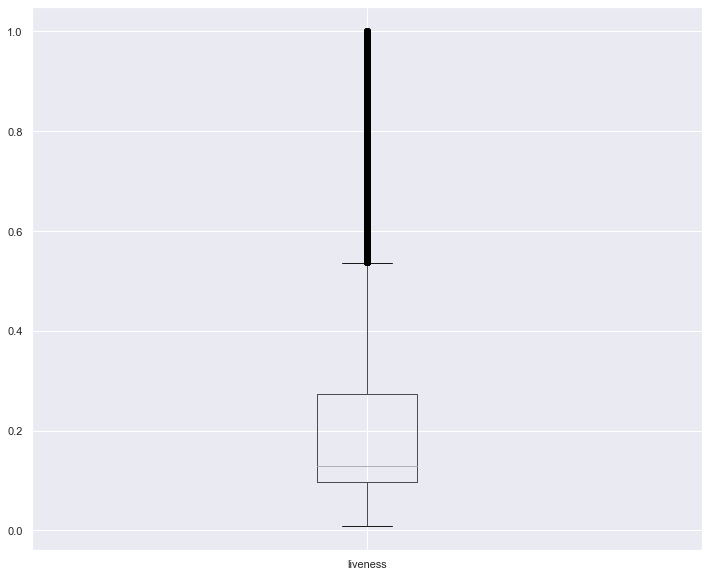

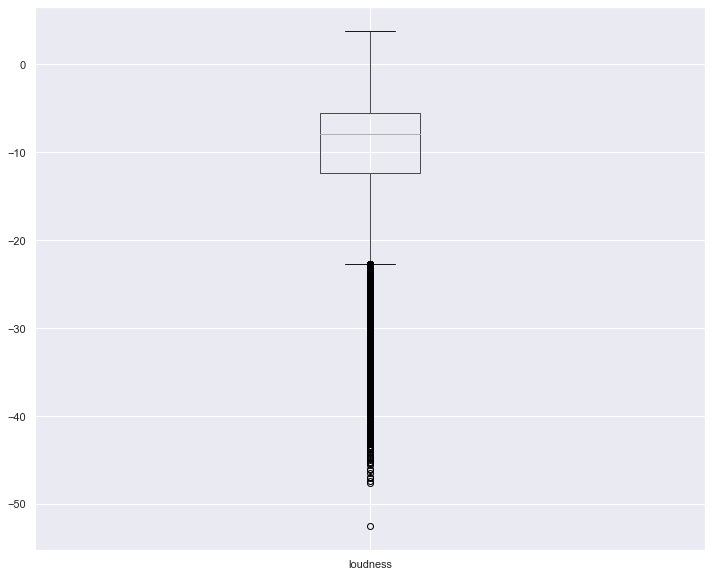

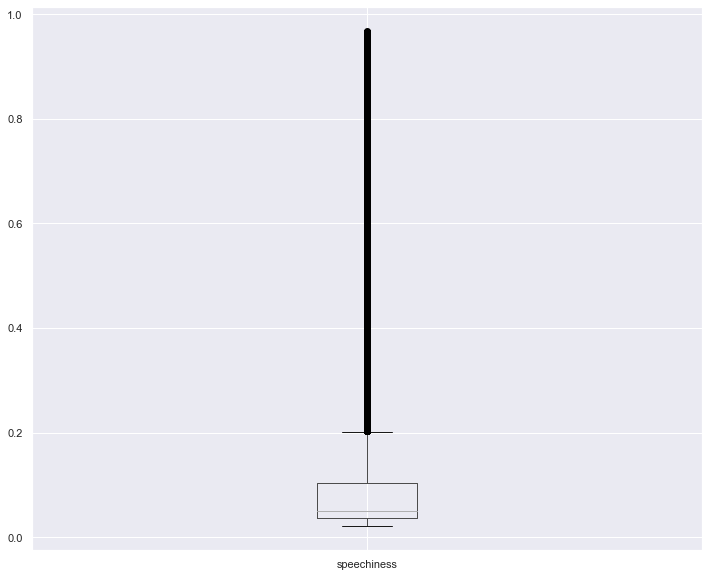

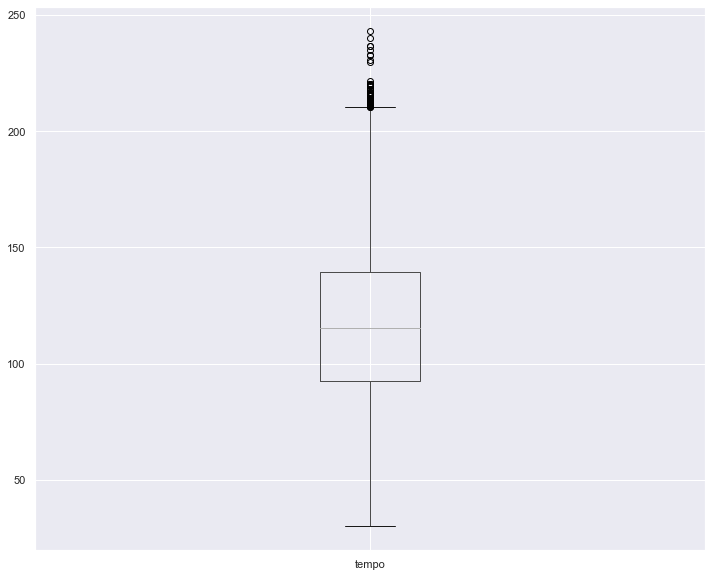

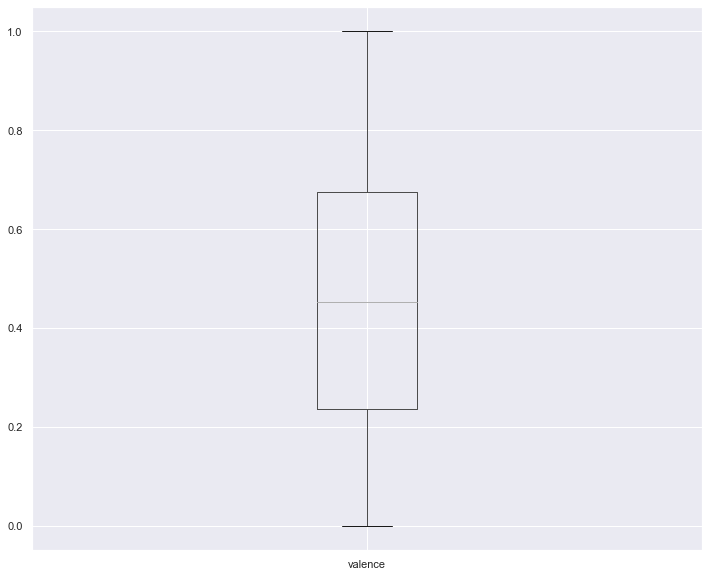

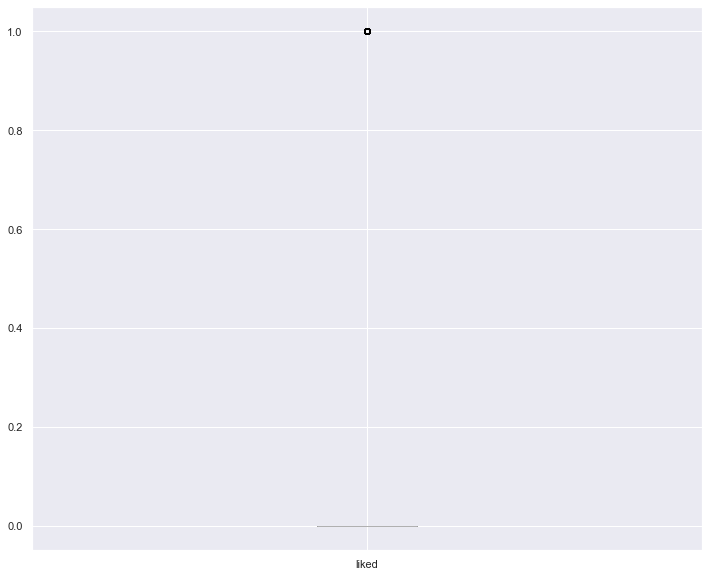

In [125]:
import matplotlib.pyplot as plt # Visualization Library in Python
import seaborn as sns # Visualization Library in Python

df_num=df.select_dtypes(exclude=['object','datetime64[ns, UTC]']) # Filter to only numerical features

for column in df_num:
    plt.figure()
    df_num.boxplot([column])

Considering we are asking various questions in the analysis that pertain to do different audio features, we are going to be very intentional with why we remove certain rows.  To being, the duration feature contains quite a large number of high value.  Let's explore that some more!  However, please keep in mind we are going to disregard the some of the other high valued features (acousticness, danceability, popularity, as we have some portions of the analysis that specifically focus on this.   For example, when looking at what makes the song popular or a hit, it does not make sense to drop the high values in the popularity column as these are the tracks we will focus this portion of analysis on. 

#### Removing Outliers in *Duration_ms*

<AxesSubplot:>

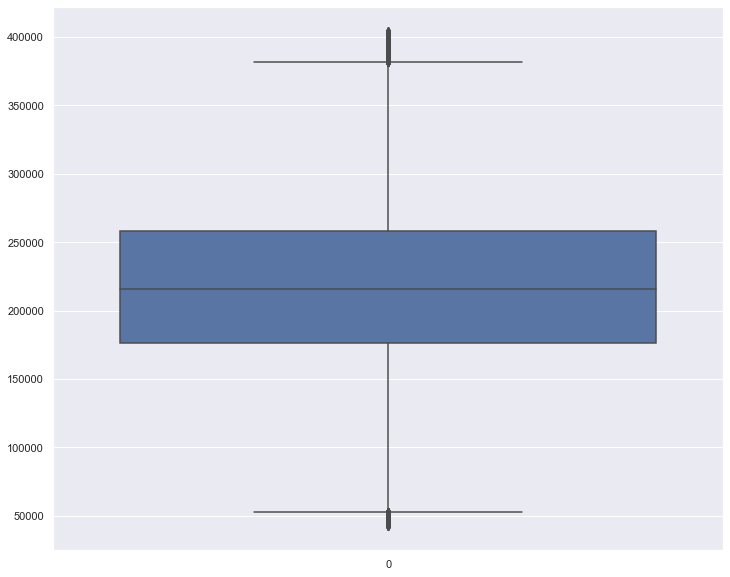

In [126]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(data=df['duration_ms'])

##### Removing with the IQR * 1.5 Method 

In [4]:
import numpy as np
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(df.duration_ms)
duration_df = df[(df.duration_ms < lowerbound) | (df.duration_ms > upperbound)]

## Only 30 songs from my liked playlist are within the outliers based on duration

duration_df[duration_df['liked']==1]

## Electing to remove all observations that are outliers based on their duration

df.drop(df[ (df.duration_ms > upperbound) | (df.duration_ms < lowerbound) ].index , inplace=True)

<AxesSubplot:>

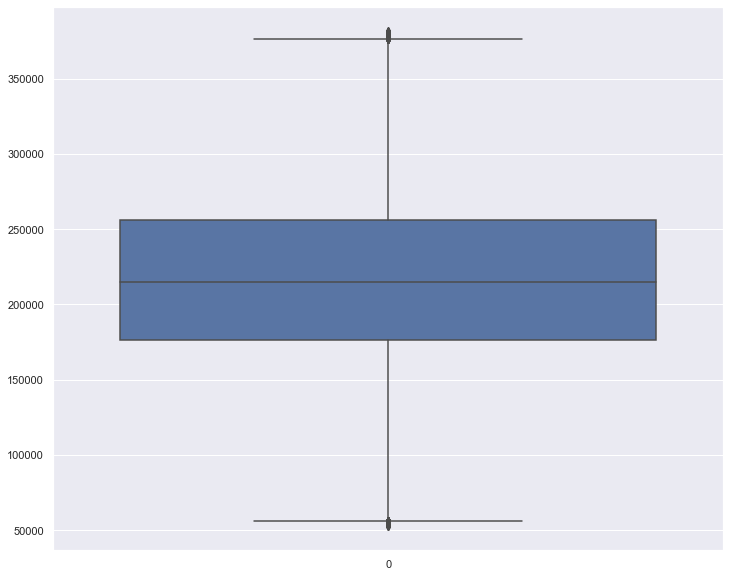

In [128]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(data=df['duration_ms'])


#### Frequency Tables & Some Visualization of my Liked Song

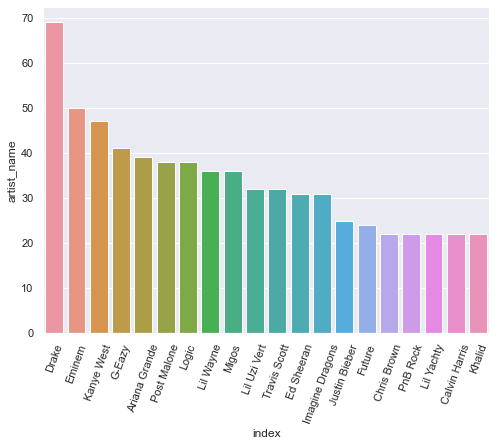

In [129]:
df_liked = df[df['liked'] == 1]
sns.set(rc={'figure.figsize':(8,6)})
df_liked = df[df['liked'] == 1]
artist_count = pd.DataFrame(df_liked['artist_name'].value_counts()).reset_index()
ax = sns.barplot(x="index", y="artist_name", data=artist_count[:20])
ax.tick_params(axis='x', rotation=70)

#### Statistically Significant Difference Between Danceability & Valence

In [216]:
# Print the descriptive statistics for "danceability" feature
df[['danceability','valence']].describe()

,danceability,valence
count,162922.000000,162922.000000
mean,0.550203,0.463287
std,0.186871,0.265466
min,0.057000,0.000000
25%,0.429000,0.239000
50%,0.567000,0.456000
75%,0.689000,0.677000
max,0.989000,1.000000


In [224]:
# Calculate the median and mode for the two variables 
print("Danceability")
print("- Median",df['danceability'].median())
print("- Mode",df['danceability'].mode())

print("Valence")
print("- Median",df['valence'].median())
print("- Mode",df['valence'].mode())

Danceability
- Median 0.5670000000000001
- Mode 0    0.626
dtype: float64
Valence
- Median 0.456
- Mode 0    0.961
dtype: float64


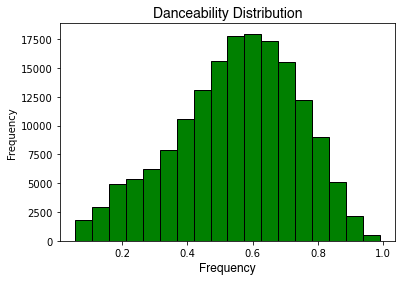

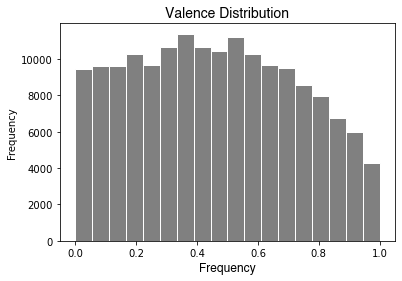

In [6]:
# Visualzie the data 
import matplotlib.pyplot as plt
## Transfer to a List
danceability = df['danceability'].tolist()
valence = df['valence'].tolist()

## Create histograms for each variable 
df['danceability'].plot(kind = 'hist', bins = 18, ec = 'black',color = 'green')
plt.title('Danceability Distribution', fontname = 'helvetica',fontsize = 14)
plt.xlabel("Danceability Value", fontname = 'helvetica',fontsize = 12)
plt.xlabel("Frequency", fontname = 'helvetica',fontsize = 12)
plt.show()

df['valence'].plot(kind = 'hist', bins = 18, ec = 'white',color = 'gray')
plt.title('Valence Distribution', fontname = 'helvetica',fontsize = 14)
plt.xlabel("Valence Value", fontname = 'helvetica',fontsize = 12)
plt.xlabel("Frequency", fontname = 'helvetica',fontsize = 12)
plt.show()

In [7]:
# Examine Sub Groups so we can have two independent groups  
less = df[df['valence'] < 0.5]
more = df[df['valence'] > 0.5]

# Calculate the median and mode for the two variables 
print("Danceability Statistics where Valence < 0.5")
print("- Median",less['danceability'].median())
print("- Mode",less['danceability'].mode())

print("Danceability Statistics where Valence > 0.5")
print("- Median",more['valence'].median())
print("- Mode",more['valence'].mode())

Danceability Statistics where Valence < 0.5
- Median 0.483
- Mode 0    0.499
1    0.531
dtype: float64
Danceability Statistics where Valence > 0.5
- Median 0.7020000000000001
- Mode 0    0.961
dtype: float64


In [8]:
# Print the descriptive statistics for "danceability" feature
less[['danceability']].describe()

,danceability
count,91768.000000
mean,0.473894
std,0.186640
min,0.057000
25%,0.339000
50%,0.483000
75%,0.607000
max,0.987000


In [9]:
more[['danceability']].describe()

,danceability
count,74030.000000
mean,0.641463
std,0.140957
min,0.085000
25%,0.548000
50%,0.651000
75%,0.745000
max,0.989000


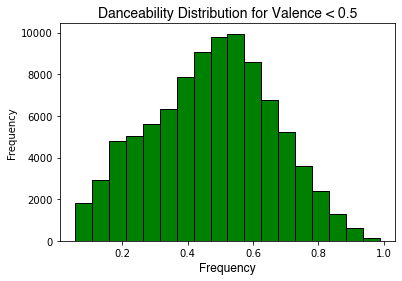

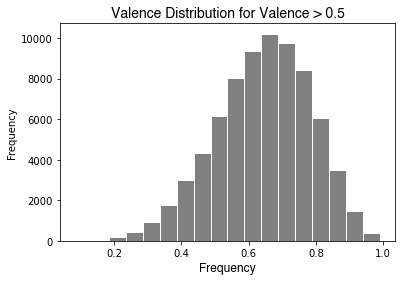

In [10]:
## Create histograms for each variable 
less['danceability'].plot(kind = 'hist', bins = 18, ec = 'black',color = 'green')
plt.title('Danceability Distribution for Valence < 0.5', fontname = 'helvetica',fontsize = 14)
plt.xlabel("Danceability Value", fontname = 'helvetica',fontsize = 12)
plt.xlabel("Frequency", fontname = 'helvetica',fontsize = 12)
plt.show()

more['danceability'].plot(kind = 'hist', bins = 18, ec = 'white',color = 'gray')
plt.title('Valence Distribution for Valence > 0.5', fontname = 'helvetica',fontsize = 14)
plt.xlabel("Valence Value", fontname = 'helvetica',fontsize = 12)
plt.xlabel("Frequency", fontname = 'helvetica',fontsize = 12)
plt.show()

In [14]:
from scipy.stats import ttest_ind, welch_ttest
ttest_ind(less['danceability'],more['danceability'],equal_var=False)

ImportError: cannot import name 'welch_ttest' from 'scipy.stats' (/Users/yiannimercer/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/__init__.py)

In [13]:
# Difference of Means Test
from scipy import stats

n1 = len(less)
n2 = len(more)

x1 = less['danceability'].mean()
x2 = more['danceability'].mean()

s1 = np.std(less['danceability'],ddof = 1)
s2 = np.std(more['danceability'],ddof = 1)

SE = np.sqrt(s1**2/n1 + s2**2/n2)
tscore = np.abs((x1-x2))/SE
df = min(n1,n2)

pvalue = 2*stats.t.cdf(-tscore, df)

Spooled = np.sqrt((n1-1) * s1**2+(n2-1)*s2**2)/(n1+n2-2)
g = (x1-x2)/Spooled

print("Standard Error:", SE)
print("T-score:",tscore)
print("DF:",df)
print("P-value:",pvalue)
print("Hedge's g:",g)

Standard Error: 0.00080497435329206
T-score: 208.1667596597073
DF: 74030
P-value: 0.0
Hedge's g: -406.65269441110706


<ipython-input-142-97c657b2f1ca>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 576x432 with 0 Axes>

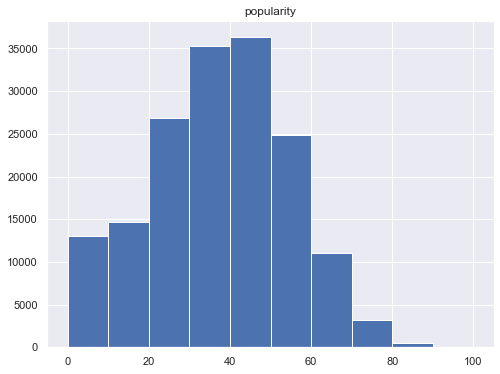

<Figure size 576x432 with 0 Axes>

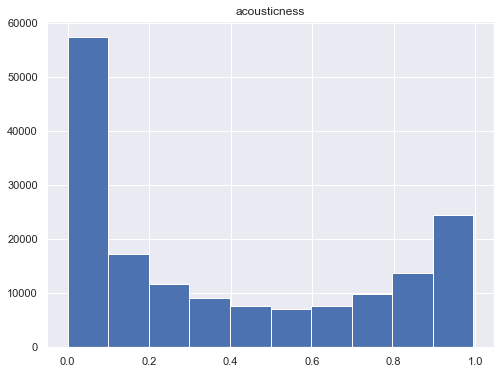

<Figure size 576x432 with 0 Axes>

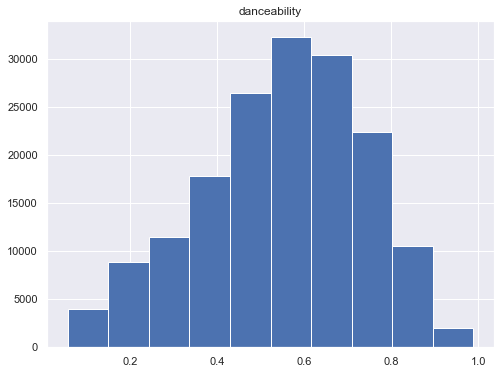

<Figure size 576x432 with 0 Axes>

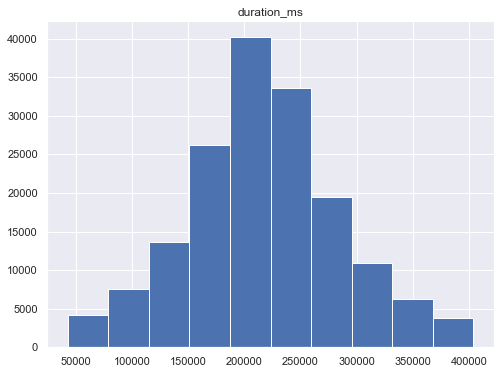

<Figure size 576x432 with 0 Axes>

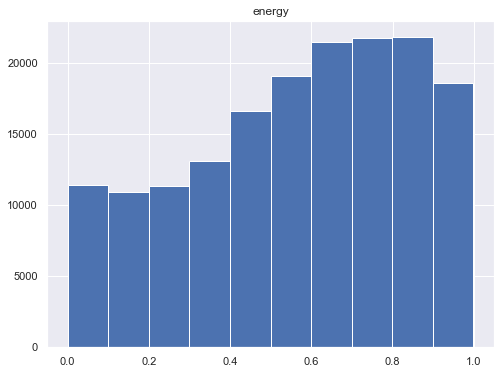

<Figure size 576x432 with 0 Axes>

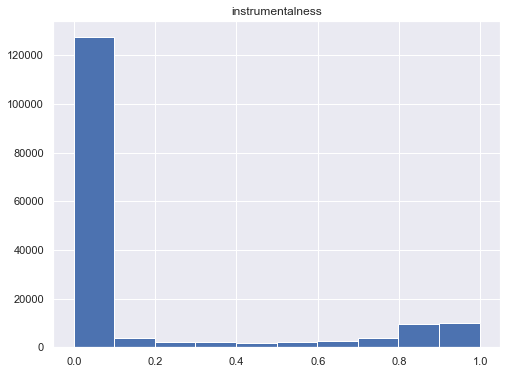

<Figure size 576x432 with 0 Axes>

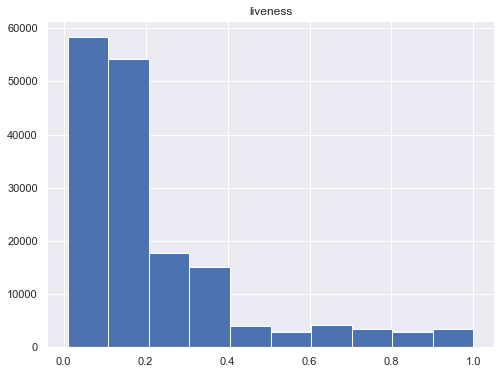

<Figure size 576x432 with 0 Axes>

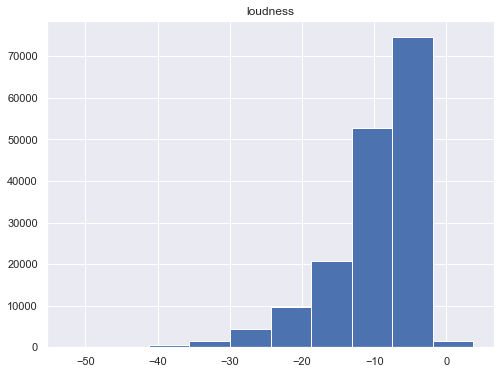

<Figure size 576x432 with 0 Axes>

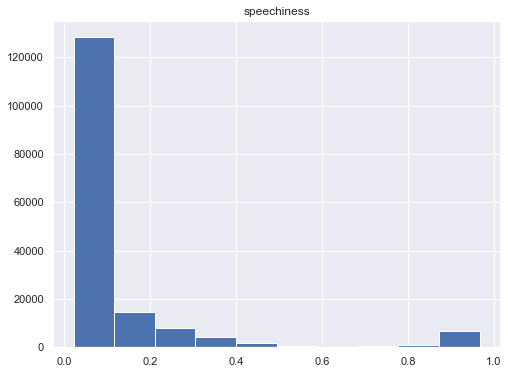

<Figure size 576x432 with 0 Axes>

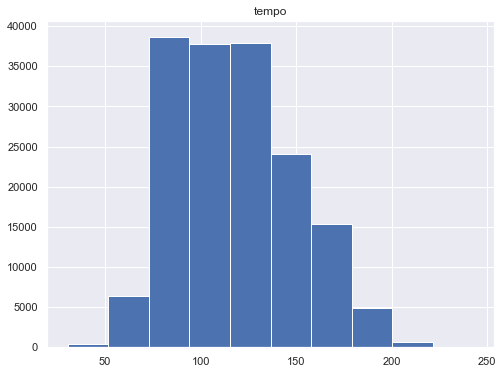

<Figure size 576x432 with 0 Axes>

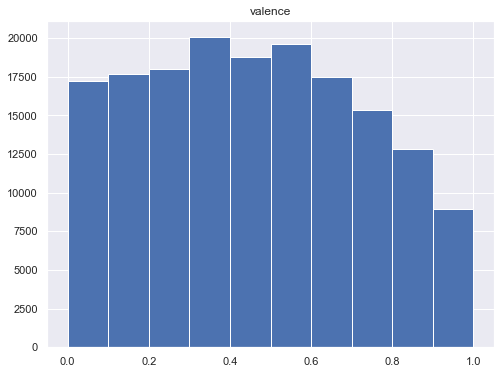

<Figure size 576x432 with 0 Axes>

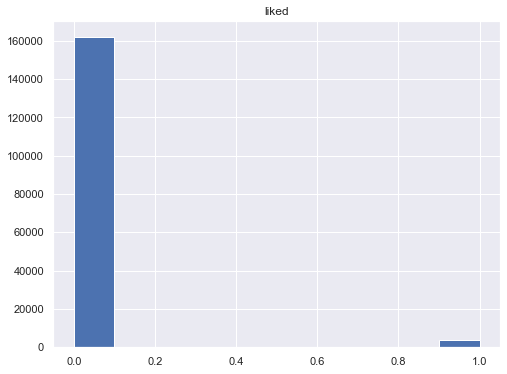

In [142]:
## Let's check some of these distributions
for column in df_num:
    plt.figure()
    df_num.hist([column])

#### Correlation Among Audio Features

<AxesSubplot:>

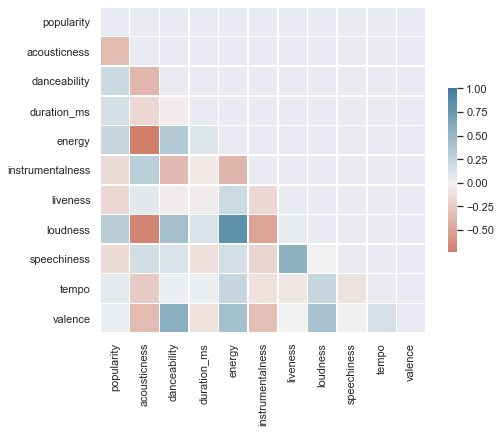

In [157]:
corr = df_num.drop(['liked'],axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlation Among Genres 

<AxesSubplot:xlabel='genre', ylabel='genre'>

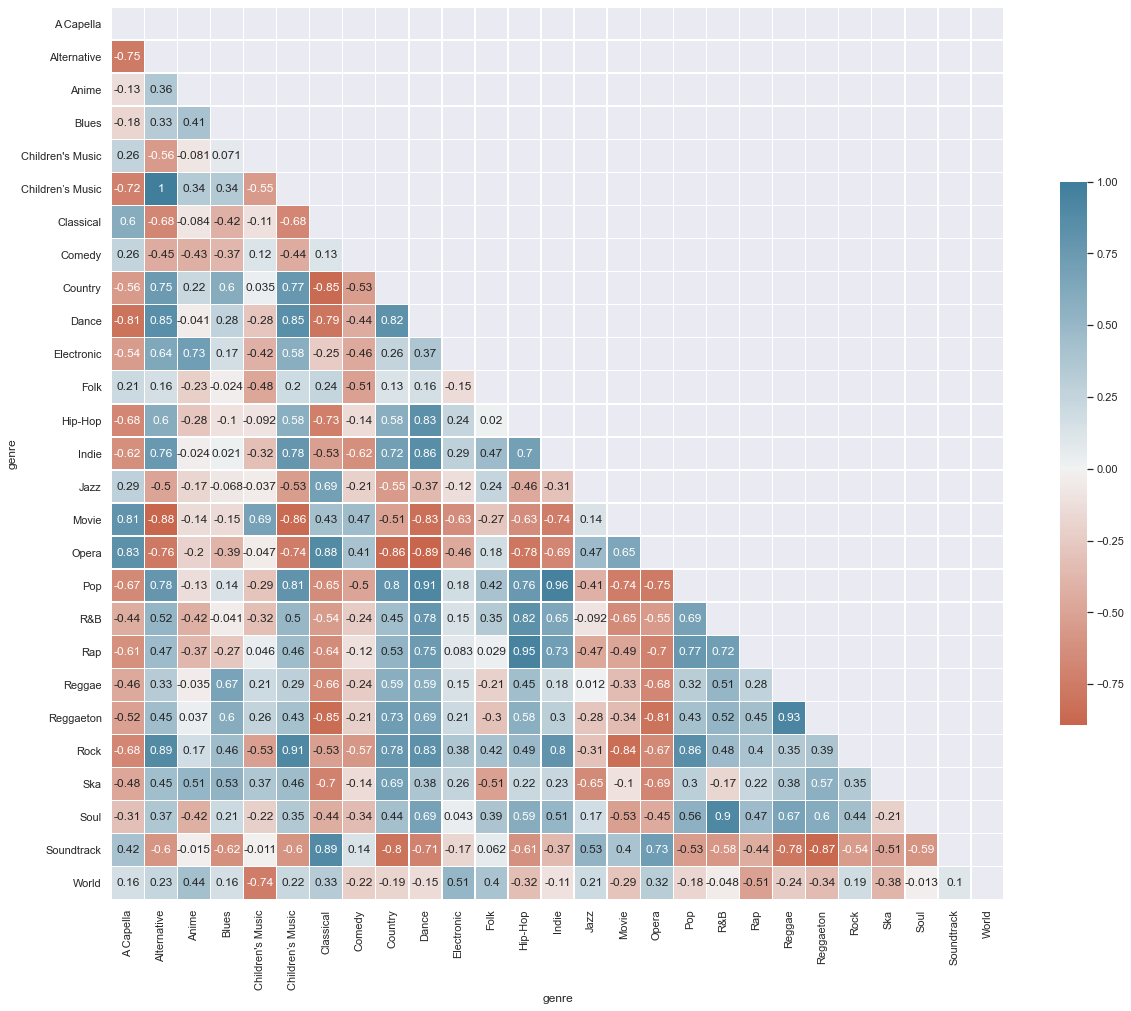

In [186]:
from sklearn.preprocessing import scale
genre_df = df.groupby("genre")[['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']].mean().reset_index()
genre_corr = pd.DataFrame(scale(genre_df.drop(['genre'],axis =1))).T.corr()


genre_corr.columns = genre_df['genre']
genre_corr.index = genre_df['genre']

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(genre_corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

fig, ax = plt.subplots(figsize=(20,20)) 

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(genre_corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)

In [187]:
genre_df

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,A Capella,9.302521,0.829941,0.412252,204467.697479,0.250313,0.007491,0.136924,-13.660387,0.042414,111.518950,0.328724
1,Alternative,50.306090,0.159450,0.543565,228423.135765,0.715110,0.058584,0.196808,-6.483679,0.089321,122.543586,0.451694
2,Anime,24.307808,0.278880,0.475870,226399.893536,0.673342,0.272400,0.192102,-7.785890,0.065635,126.963486,0.448154
3,Blues,33.767762,0.339913,0.537848,228359.540720,0.602526,0.088402,0.218762,-9.028558,0.061136,121.052053,0.589710
4,Children's Music,4.075295,0.581925,0.695933,147306.699021,0.401777,0.141792,0.163916,-11.585204,0.107131,121.579855,0.680654
...,...,...,...,...,...,...,...,...,...,...,...,...
22,Rock,58.806883,0.209459,0.528288,231434.200765,0.676579,0.052207,0.194418,-7.768370,0.052839,122.964319,0.524713
23,Ska,27.452390,0.086617,0.511054,187338.563289,0.838268,0.056342,0.244932,-5.934816,0.087017,131.017627,0.649370
24,Soul,43.482038,0.353356,0.616815,223631.680676,0.547956,0.064003,0.182504,-8.677934,0.082508,115.618820,0.481317
25,Soundtrack,33.695021,0.710835,0.264334,175052.576977,0.223712,0.789601,0.136091,-19.295046,0.043465,104.138689,0.114377
